# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# CREATED IMBALANCED DATAFRAME

In [2]:
# Definir parâmetros para criar o conjunto de dados
n_samples = 10000  # Número total de exemplos
weights = [0.95, 0.05]  # Pesos das classes (maior peso para a classe majoritária)
n_features = 2  # Número total de recursos
n_informative = 2  # Número de recursos informativos
n_clusters_per_class = 1  # Número de clusters por classe

# Gerar o conjunto de dados sintético
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=0,  # Não há recursos redundantes neste exemplo
    n_clusters_per_class=n_clusters_per_class,
    weights=weights,
    random_state=1142
)

# Imprimir a contagem das classes
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 9448, 1: 552}


# APPLYING BALANCING METHOD

In [3]:
# Dados de entrada: X (atributos) e y (rótulos/classes)

# Aplicando o SMOTE
smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Aplicando o ADASYN
adasyn = ADASYN()
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X, y)

# VISUALIZATION BOTH METHOD

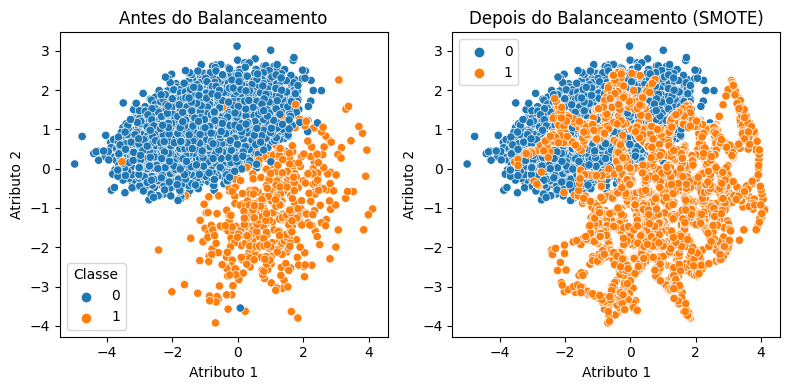

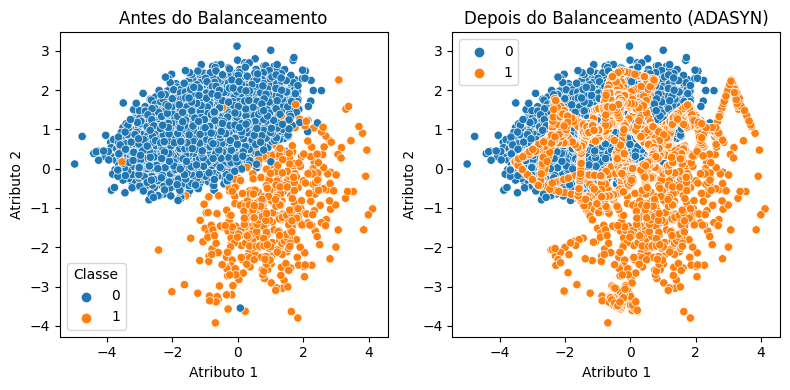

In [4]:
# Converter X e y em dataframes
X_df = pd.DataFrame(X, columns=['Atributo 1', 'Atributo 2'])
y_df = pd.Series(y, name='Classe')

# Plotar gráfico antes do balanceamento
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_df['Atributo 1'], y=X_df['Atributo 2'], hue=y_df)
plt.title('Antes do Balanceamento')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

# Plotar gráfico depois do balanceamento usando SMOTE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_resampled_smote[:, 0], y=X_resampled_smote[:, 1], hue=y_resampled_smote)
plt.title('Depois do Balanceamento (SMOTE)')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

plt.tight_layout()
plt.show()

# Plotar gráfico antes do balanceamento
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_df['Atributo 1'], y=X_df['Atributo 2'], hue=y_df)
plt.title('Antes do Balanceamento')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

# Plotar gráfico depois do balanceamento usando ADASYN
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_resampled_adasyn[:, 0], y=X_resampled_adasyn[:, 1], hue=y_resampled_adasyn)
plt.title('Depois do Balanceamento (ADASYN)')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

plt.tight_layout()
plt.show()


# USING 4 MACHINE LEARNING CLASSIFICATION ALGORITHMS TO TEST BALANCING METHODS

### 1 - Decision Tree
### 2 - Random Forest
### 3 - Logistic Regression
### 4 - SVC

In [9]:
import matplotlib.pyplot as plt

# Inicializar os modelos de classificação
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
logistic_regression = LogisticRegression()
svc = SVC()

models = [decision_tree, random_forest, logistic_regression, svc]
model_names = [type(model).__name__ for model in models]

# Listas para armazenar as métricas de desempenho
precision_scores_smote = []
recall_scores_smote = []
f1_scores_smote = []

precision_scores_adasyn = []
recall_scores_adasyn = []
f1_scores_adasyn = []

# Conjunto de teste após aplicar o ADASYN
for model in models:
    # Ajustar (fit) o modelo aos dados de treinamento após aplicar o ADASYN
    model.fit(X_train_adasyn, y_train_adasyn)
    
    # Fazer previsões nos dados de teste após aplicar o ADASYN
    y_pred_adasyn = model.predict(X_test_adasyn)
    
    # Calcular as métricas de desempenho para o ADASYN
    report = classification_report(y_test_adasyn, y_pred_adasyn, output_dict=True)
    precision_scores_adasyn.append(report['weighted avg']['precision'])
    recall_scores_adasyn.append(report['weighted avg']['recall'])
    f1_scores_adasyn.append(report['weighted avg']['f1-score'])
   
    # Ajustar (fit) o modelo aos dados de treinamento após aplicar o SMOTE
    model.fit(X_train_smote, y_train_smote)
    
    # Fazer previsões nos dados de teste após aplicar o SMOTE
    y_pred_smote = model.predict(X_test_smote)
    
    # Calcular as métricas de desempenho para o SMOTE
    report = classification_report(y_test_smote, y_pred_smote, output_dict=True)
    precision_scores_smote.append(report['weighted avg']['precision'])
    recall_scores_smote.append(report['weighted avg']['recall'])
    f1_scores_smote.append(report['weighted avg']['f1-score'])
    
    print("Model:", type(model).__name__)
    print("SMOTE:")
    print(classification_report(y_test_smote, y_pred_smote))
    print("-----------")

Model: DecisionTreeClassifier
SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1873
           1       0.94      0.94      0.94      1907

    accuracy                           0.94      3780
   macro avg       0.94      0.94      0.94      3780
weighted avg       0.94      0.94      0.94      3780

-----------
Model: RandomForestClassifier
SMOTE:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1873
           1       0.97      0.93      0.95      1907

    accuracy                           0.95      3780
   macro avg       0.95      0.95      0.95      3780
weighted avg       0.95      0.95      0.95      3780

-----------
Model: LogisticRegression
SMOTE:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1873
           1       0.97      0.90      0.94      1907

    accuracy                           0.94      37

- Precision: A precisão (precision) é uma métrica que indica a proporção de instâncias classificadas como positivas que são realmente positivas. Para a classe 0 (primeira classe), a precisão é de 0,94, o que significa que 94% das instâncias classificadas como classe 0 são realmente da classe 0. Para a classe 1 (segunda classe), a precisão também é de 0,94, indicando que 94% das instâncias classificadas como classe 1 são realmente da classe 1.

- Recall: O recall (recall), também conhecido como sensibilidade, é uma métrica que indica a proporção de instâncias positivas que foram corretamente identificadas. Para a classe 0, o recall é de 0,94, o que significa que 94% das instâncias da classe 0 foram corretamente identificadas como tal. Para a classe 1, o recall também é de 0,94, indicando que 94% das instâncias da classe 1 foram corretamente identificadas.

- F1-score: O F1-score (F1-score) é uma métrica que combina a precisão e o recall em uma única medida de desempenho. É a média harmônica entre essas duas métricas. Para a classe 0, o F1-score é de 0,94, o que indica um bom equilíbrio entre precisão e recall para essa classe. Para a classe 1, o F1-score também é de 0,94, indicando um bom equilíbrio entre precisão e recall para essa classe.

- Support: O suporte (support) é o número de instâncias reais de cada classe no conjunto de teste. Para a classe 0, o suporte é de 1873, o que significa que existem 1873 instâncias da classe 0 no conjunto de teste. Para a classe 1, o suporte é de 1907, indicando que existem 1907 instâncias da classe 1 no conjunto de teste.

- Accuracy: A acurácia (accuracy) é a proporção de instâncias corretamente classificadas em relação ao total de instâncias. Nesse caso, a acurácia é de 0,94, o que significa que 94% das instâncias foram classificadas corretamente pelo modelo.

- Macro avg: A média macro (macro avg) é a média das métricas (precisão, recall e F1-score) calculadas separadamente para cada classe, sem levar em consideração o desequilíbrio entre as classes. Nesse caso, a média macro para a precisão, recall e F1-score é de 0,94.

- Weighted avg: A média ponderada (weighted avg) é a média das métricas ponderadas pelo suporte de cada classe. Essa média leva em consideração o desequilíbrio entre as classes, dando mais importância às classes com maior número de instâncias. Nesse caso, a média ponderada para a precisão, recall e F1-score é de 0,94.



A precisão, recall e F1-score indicam o quão bem o modelo está classificando corretamente as instâncias de cada classe. Um valor alto para essas métricas é desejável, pois indica um desempenho melhor.

# VISUALIZATION OF METRICS AND THE BEST METHOD FOR A CERTAIN ALGORITHM

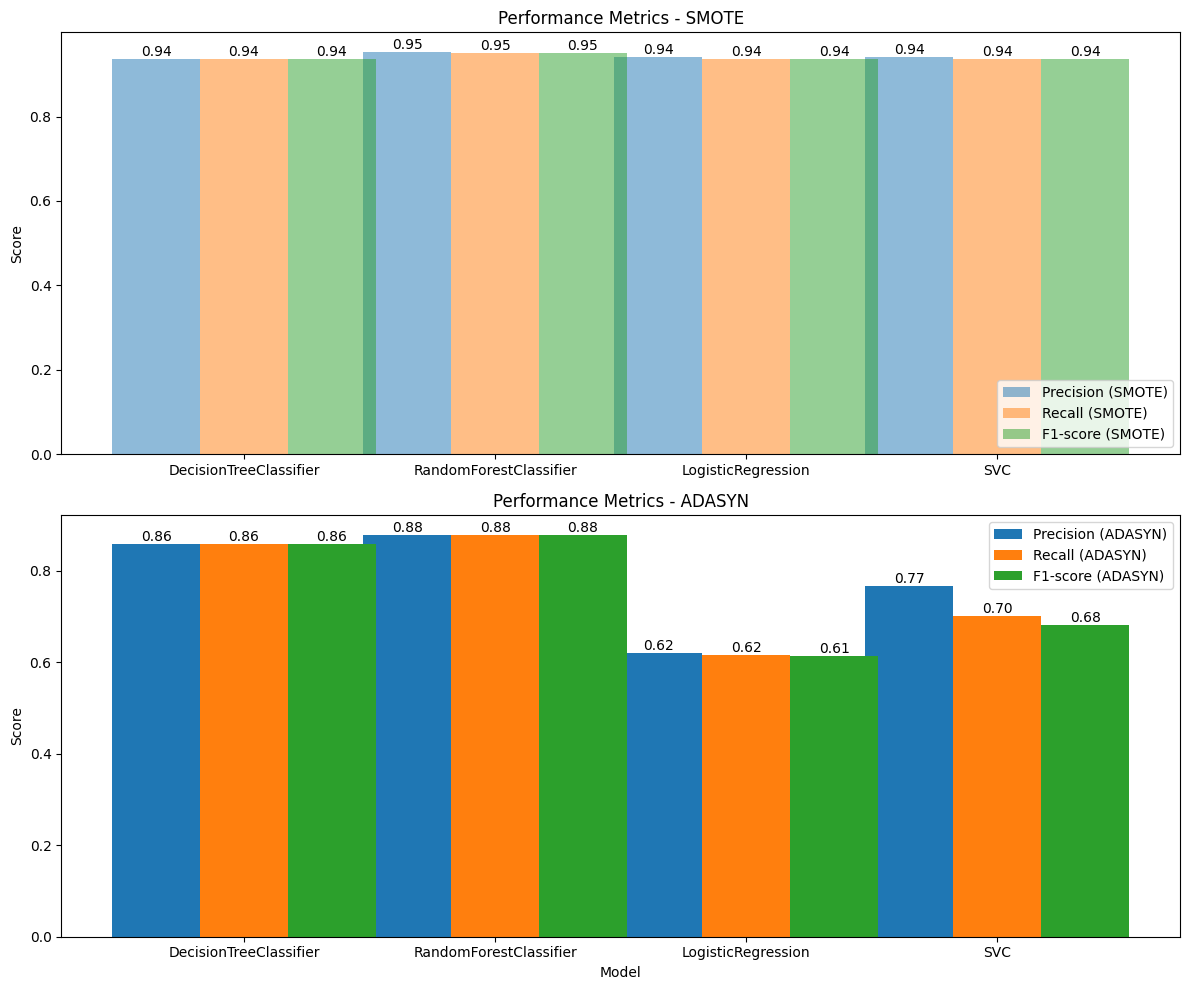

In [8]:
# Plotar gráficos de barras para comparar as métricas de desempenho
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

x = np.arange(len(model_names))
width = 0.35

# Gráficos de barras - SMOTE
ax1.bar(x, precision_scores_smote, width, label='Precision (SMOTE)', alpha=0.5)
ax1.bar(x + width, recall_scores_smote, width, label='Recall (SMOTE)', alpha=0.5)
ax1.bar(x + 2*width, f1_scores_smote, width, label='F1-score (SMOTE)', alpha=0.5)

ax1.set_ylabel('Score')
ax1.set_title('Performance Metrics - SMOTE')
ax1.set_xticks(x + width)
ax1.set_xticklabels(model_names)
ax1.legend(loc='lower right')

# Adicionar anotações aos gráficos de barras - SMOTE
for i in range(len(model_names)):
    ax1.annotate(f'{precision_scores_smote[i]:.2f}', (x[i], precision_scores_smote[i]), ha='center', va='bottom')
    ax1.annotate(f'{recall_scores_smote[i]:.2f}', (x[i] + width, recall_scores_smote[i]), ha='center', va='bottom')
    ax1.annotate(f'{f1_scores_smote[i]:.2f}', (x[i] + 2*width, f1_scores_smote[i]), ha='center', va='bottom')

# Gráficos de barras - ADASYN
ax2.bar(x, precision_scores_adasyn, width, label='Precision (ADASYN)')
ax2.bar(x + width, recall_scores_adasyn, width, label='Recall (ADASYN)')
ax2.bar(x + 2*width, f1_scores_adasyn, width, label='F1-score (ADASYN)')

ax2.set_xlabel('Model')
ax2.set_ylabel('Score')
ax2.set_title('Performance Metrics - ADASYN')
ax2.set_xticks(x + width)
ax2.set_xticklabels(model_names)
ax2.legend()

# Adicionar anotações aos gráficos de barras - ADASYN
for i in range(len(model_names)):
    ax2.annotate(f'{precision_scores_adasyn[i]:.2f}', (x[i], precision_scores_adasyn[i]), ha='center', va='bottom')
    ax2.annotate(f'{recall_scores_adasyn[i]:.2f}', (x[i] + width, recall_scores_adasyn[i]), ha='center', va='bottom')
    ax2.annotate(f'{f1_scores_adasyn[i]:.2f}', (x[i] + 2*width, f1_scores_adasyn[i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()